In [3]:
import numpy as np

data = np.loadtxt("data2.txt", delimiter=",")
x = data[:, 0]
y = data[:, 1]

for i in range(len(x)):
    print(x[i], y[i])

6.1101 17.592
5.5277 9.1302
8.5186 13.662
7.0032 11.854
5.8598 6.8233
8.3829 11.886
7.4764 4.3483
8.5781 12.0
6.4862 6.5987
5.0546 3.8166
5.7107 3.2522
14.164 15.505
5.734 3.1551
8.4084 7.2258
5.6407 0.71618
5.3794 3.5129
6.3654 5.3048
5.1301 0.56077
6.4296 3.6518
7.0708 5.3893
6.1891 3.1386
20.27 21.767
5.4901 4.263
6.3261 5.1875
5.5649 3.0825
18.945 22.638
12.828 13.501
10.957 7.0467
13.176 14.692
22.203 24.147
5.2524 -1.22
6.5894 5.9966
9.2482 12.134
5.8918 1.8495
8.2111 6.5426
7.9334 4.5623
8.0959 4.1164
5.6063 3.3928
12.836 10.117
6.3534 5.4974
5.4069 0.55657
6.8825 3.9115
11.708 5.3854
5.7737 2.4406
7.8247 6.7318
7.0931 1.0463
5.0702 5.1337
5.8014 1.844
11.7 8.0043
5.5416 1.0179
7.5402 6.7504
5.3077 1.8396
7.4239 4.2885
7.6031 4.9981
6.3328 1.4233
6.3589 -1.4211
6.2742 2.4756
5.6397 4.6042
9.3102 3.9624
9.4536 5.4141
8.8254 5.1694
5.1793 -0.74279
21.279 17.929
14.908 12.054
18.959 17.054
7.2182 4.8852
8.2951 5.7442
10.236 7.7754
5.4994 1.0173
20.341 20.992
10.136 6.6799
7.3345 4.

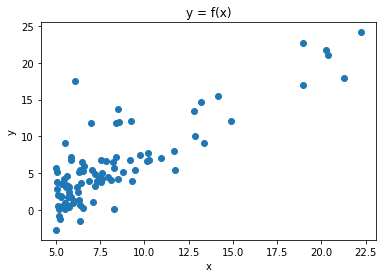

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = f(x)")
plt.show()

In [3]:
#Add array of ones to original feature
#Generates new matrix containing feature terms and bias term
X = np.column_stack((np.ones_like(x), x))
#Implement closed-form solution to normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

w_0 = theta[0]
w_1 = theta[1]

print(theta)


[-3.89578088  1.19303364]


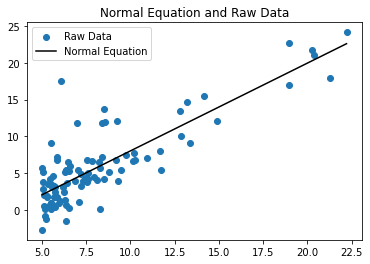

In [4]:
x_pred = np.linspace(np.min(x), np.max(x), 25)
y_pred = w_0 + w_1*x_pred

plt.scatter(x, y, label='Raw Data')
plt.plot(x_pred, y_pred, color='black', label='Normal Equation')
plt.title("Normal Equation and Raw Data")
plt.legend()
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

#Dataset will be 80% train data and 20% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [107]:
print("Train Data")
print(x_train, y_train)
print("\nTest Data")
print(x_test, y_test)

Train Data
[ 6.0062  7.9334  5.8598  7.5386  8.2111  8.4084  5.0269 12.836   5.1884
 18.959   6.1101  5.6063  8.8254  7.0032  5.2524  9.3102  7.4764  7.8247
  5.3794  8.5172 10.957  14.164   5.6407 22.203   5.5649  8.0959  8.2951
  5.5416  7.2259 11.7     5.3054  5.6397  7.6031 20.341   5.5204 13.394
  5.7737  5.4369  7.6366  5.1077 18.945   5.8707  9.7687  5.7292  5.1793
 14.908   6.3328 10.236   5.3077  6.8825  5.0702  5.0365  7.2182  6.3534
  8.5781  6.5894 10.274   6.5479 10.136  12.828   5.7107  8.3829 20.27
  5.0546  5.0594  7.5402  7.3345 21.279   8.5186  6.1891  6.002   7.0931
  9.4536 11.708   6.3261  5.5277  5.7077] [ 1.2784   4.5623   6.8233   3.8845   6.5426   7.2258  -2.6807  10.117
  0.20421 17.054   17.592    3.3928   5.1694  11.854   -1.22     3.9624
  4.3483   6.7318   3.5129   4.2415   7.0467  15.505    0.71618 24.147
  3.0825   4.1164   5.7442   1.0179   3.3411   8.0043   1.9869   4.6042
  4.9981  20.992    0.152    9.0551   2.4406   0.61705  4.2959   2.0576
 22.638 

In [97]:
def batch_gradient_descent(X, Y, rate, iterations):
    mse = []
    num_features = X.shape[1]
    theta = [0] * num_features
    for i in range(iterations):
        pred = X @ theta
        gradient = np.dot(X.T, pred - Y)
        theta = theta - (rate * gradient)
        mse_val = np.mean((X @ theta - Y) ** 2)
        mse.append(mse_val)
    return mse

In [108]:
iterations = 50
learn_rate = 0.0001

x_train = x_train.reshape(-1, 1)

mse_values_train = batch_gradient_descent(x_train, y_train, rate=learn_rate, iterations=iterations)

In [109]:
x_test = x_test.reshape(-1, 1)

mse_values_test = batch_gradient_descent(x_test, y_test, rate=learn_rate, iterations=iterations)

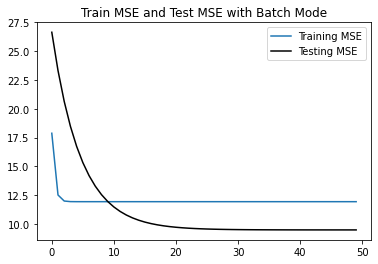

In [110]:
plt.plot(range(iterations), mse_values_train, label='Training MSE')
plt.plot(range(iterations), mse_values_test, color='black', label='Testing MSE')
plt.title("Train MSE and Test MSE with Batch Mode")
plt.legend()
plt.show()

In [101]:
def stochastic_gradient_descent(X, Y, rate, iterations):
    mse = []
    num_samples = X.shape[0]
    theta = [0] * X.shape[1]
    for i in range(iterations):
        rnd = np.random.choice(num_samples)
        x, y = X[rnd], Y[rnd]
        pred = x @ theta
        gradient = np.dot(x.T, pred - y)
        theta = theta - (rate * gradient)
        mse_val = np.mean((x @ theta - y) ** 2)
        mse.append(mse_val)
    return mse

In [111]:
iterations = 100
learn_rate = 0.0001

mse_values_train = stochastic_gradient_descent(x_train, y_train, rate=learn_rate, iterations=iterations)

In [112]:
mse_values_test = stochastic_gradient_descent(x_test, y_test, rate=learn_rate, iterations=iterations)

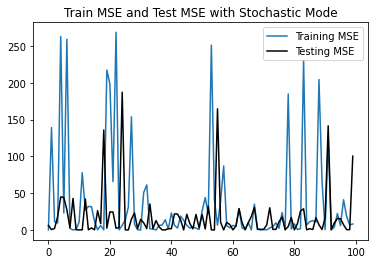

In [113]:
plt.plot(range(iterations), mse_values_train, label='Training MSE')
plt.plot(range(iterations), mse_values_test, color='black', label='Testing MSE')
plt.title("Train MSE and Test MSE with Stochastic Mode")
plt.legend()
plt.show()

It appears that batch gradient descent converges much faster (in terms of iterations), mainly because it uses the entire dataset for each iteration. On the other hand, stochastic gradient descent is slower to converge because it only uses one sample from the dataset for each iterations. This also means that there is a lot more noise in the MSE values compared to the linearity of the batch mode. 

Due to the noise inherent to the stochastic mode, however, we are able to converge to a lower MSE value. The generality of using the entire dataset over and over again in batch mode makes it harder for the model to drop below ~10 MSE. 

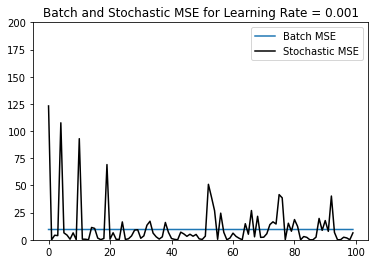

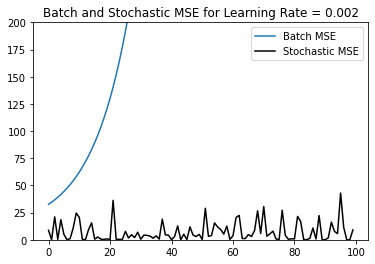

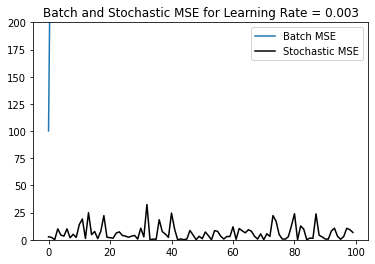

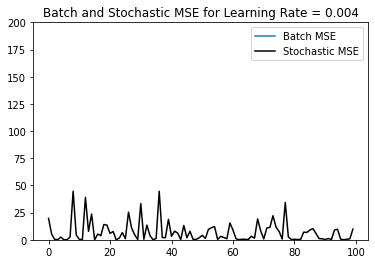

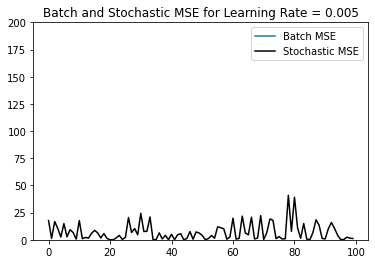

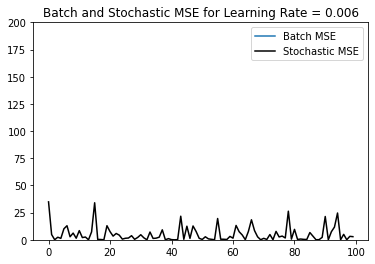

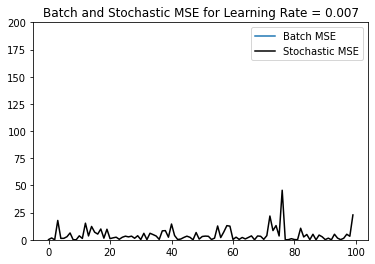

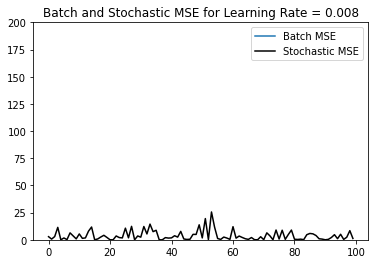

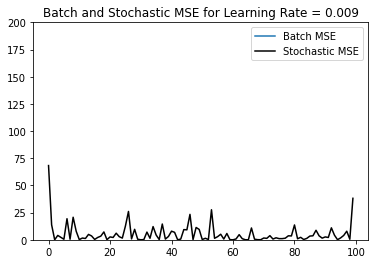

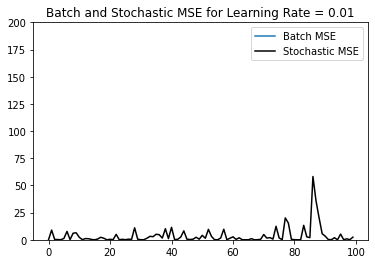

In [114]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
iterations = 100

for rate in learning_rates:
    mse_values_test_batch = batch_gradient_descent(x_test, y_test, rate=rate, iterations=iterations)
    mse_values_test_stochastic = stochastic_gradient_descent(x_test, y_test, rate=rate, iterations=iterations)
    plt.plot(range(iterations), mse_values_test_batch, label='Batch MSE')
    plt.plot(range(iterations), mse_values_test_stochastic, color='black', label='Stochastic MSE')    
    plt.title('Batch and Stochastic MSE for Learning Rate = {}'.format(rate))
    plt.legend()
    plt.ylim(0, 200)
    plt.show()

The lower the learning rate the better. In terms of the given learning rate values, 0.001 is the best for us here. In fact, learning rates above this, depending on the dataset, actually cause our batch gradient descent algorithm to diverge. The high learning rate causes overshooting the minimum of the cost function. Disregarding divergence, the lower learning rate actually yields higher performance over many iterations, as evident by reaching MSE closer to zero. 